<a href="https://colab.research.google.com/github/plee0617/IS-170-Binder/blob/K-nearest-Neighbors/LEE_IS170_MW_HW7_KNearestipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pang Yia Lee
# 3/27/2023

In [ ]:
# import the data
from sklearn import datasets
import numpy as np
import pandas as pd
df = pd.read_csv('Loan_Default.csv') 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [ ]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,...,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,...,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,...,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,...,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,...,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,...,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,...,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,...,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,...,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,...,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,...,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,...,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,...,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,...,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,...,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,...,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.shape

(148670, 34)

34 features and Dataframe isn't displaying them. To show them, we need to mess with the pandas settings

In [ ]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
# convert to lowercase
df.columns= df.columns.str.lower()

In [ ]:
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [ ]:
# filter
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [ ]:
# dropping columns that doesn't add any valuable information

columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
df.drop(columns,axis=1, inplace =True)

In [ ]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [ ]:
df.shape

(148670, 10)

After filtering

In [ ]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.56,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.25,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.00,360.0,758000.0,10440.0,602,25-34,0,39.0


In [ ]:
df.shape

(148670, 10)

In [ ]:
# checks for duplicates
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(148664, 10)

In [ ]:
df.isna().sum()

loan_type               0
loan_amount             0
rate_of_interest    36437
term                   41
property_value      15096
income               9146
credit_score            0
age                   200
status                  0
dtir1               24115
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  112227 non-null  float64
 3   term              148623 non-null  float64
 4   property_value    133568 non-null  float64
 5   income            139518 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148464 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


In [ ]:
# filling null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

In [ ]:
df.isna().sum()

loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
status              0
dtir1               0
dtype: int64

Data & Visualization

In [ ]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [ ]:
df['loan_type'].max()

'type3'

In [ ]:
df['loan_type'].min()

'type1'

In [ ]:
df['loan_amount'].max()

3576500

In [ ]:
df['loan_amount'].min()

16500

In [ ]:
df['age'].value_counts()

45-54    34919
35-44    32815
55-64    32533
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: age, dtype: int64

In [ ]:
df['rate_of_interest'].max()

8.0

In [ ]:
df['rate_of_interest'].min()  

0.0

In [ ]:
df['rate_of_interest'].mean()

4.045481969579513

In [ ]:
df['status'].value_counts()

0    112027
1     36637
Name: status, dtype: int64

In [ ]:
df['property_value'].value_counts()

4.979002e+05    15096
3.080000e+05     2791
2.580000e+05     2763
3.580000e+05     2679
4.080000e+05     2537
                ...  
4.648000e+06        1
3.878000e+06        1
5.758000e+06        1
2.618000e+06        1
2.698000e+06        1
Name: property_value, Length: 386, dtype: int64

In [ ]:
df['property_value'].max()

16508000.0

In [ ]:
df['property_value'].min()

8000.0

In [ ]:
df['loan_amount'].max()

3576500

In [ ]:
mask=df['property_value']==df['property_value'].max()
df[mask]['loan_amount']

17114    2476500
Name: loan_amount, dtype: int64

In [ ]:
mask = df['income']==df['income'].max()
df[mask]['status']

62237    1
Name: status, dtype: int64

In [ ]:
mask = df['income']==df['income'].max()
df[mask]['rate_of_interest']

62237    4.045482
Name: rate_of_interest, dtype: float64

In [ ]:
mask = df['income']==df['income'].min()           #!!!
df[mask]['status']

42        1
143       1
208       1
301       1
409       1
         ..
147632    1
147728    1
148163    1
148197    1
148349    1
Name: status, Length: 1259, dtype: int64

In [ ]:
mask = df['income']==df['income'].min()
df[mask]['rate_of_interest'].value_counts()

4.045482    1251
4.125000       2
3.625000       1
2.990000       1
4.750000       1
0.000000       1
3.875000       1
4.250000       1
Name: rate_of_interest, dtype: int64

In [ ]:
df['income'].value_counts()

6957.392164      9146
0.000000         1259
3600.000000      1250
4200.000000      1243
4800.000000      1191
                 ... 
45300.000000        1
154440.000000       1
137760.000000       1
145560.000000       1
79920.000000        1
Name: income, Length: 1002, dtype: int64

In [ ]:
df['income'].mean()

6957.392164451898

In [ ]:
mask=df['income']<2000

In [ ]:
mask.value_counts()

False    140706
True       7958
Name: income, dtype: int64

In [ ]:
df['income']=df['income'].apply(lambda x: x if x not in mask else df['income'].mean())

In [ ]:
mask=df['income']<2000
mask.value_counts()

False    148664
Name: income, dtype: int64

In [ ]:
df['income'].min()

6957.392164451898

In [ ]:
df['rate_of_interest'].value_counts()

4.045482    36437
3.990000    14454
3.625000     8799
3.875000     8592
3.750000     8473
            ...  
4.700000        1
8.000000        1
7.750000        1
5.300000        1
2.700000        1
Name: rate_of_interest, Length: 132, dtype: int64

In [ ]:
df['rate_of_interest'].min()

0.0

In [ ]:
df['rate_of_interest'].mean()

4.045481969579513

In [ ]:
mask=df['rate_of_interest']==0
mask.value_counts()

False    148663
True          1
Name: rate_of_interest, dtype: int64

In [ ]:
df['rate_of_interest']=df['rate_of_interest'].apply(lambda x: x if x not in mask else df['rate_of_interest'].mean())

In [ ]:
df['rate_of_interest'].min()

2.125

<Axes: xlabel='loan_type', ylabel='count'>

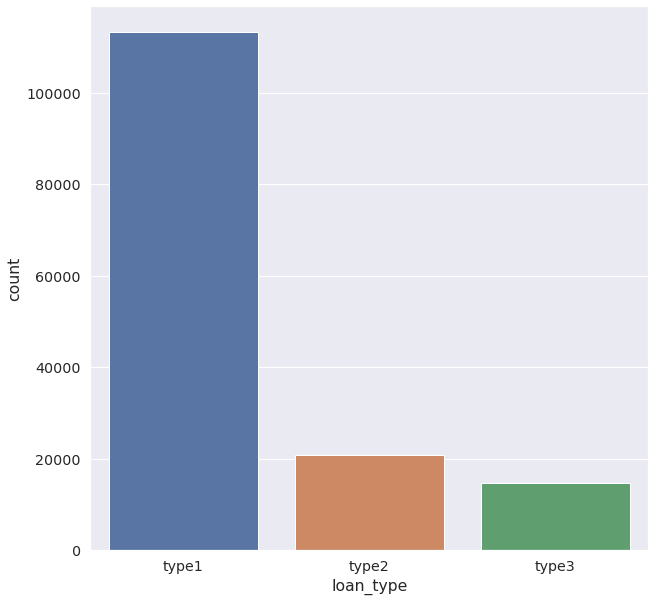

In [ ]:
sns.countplot(data=df , x='loan_type')

<Axes: xlabel='status', ylabel='count'>

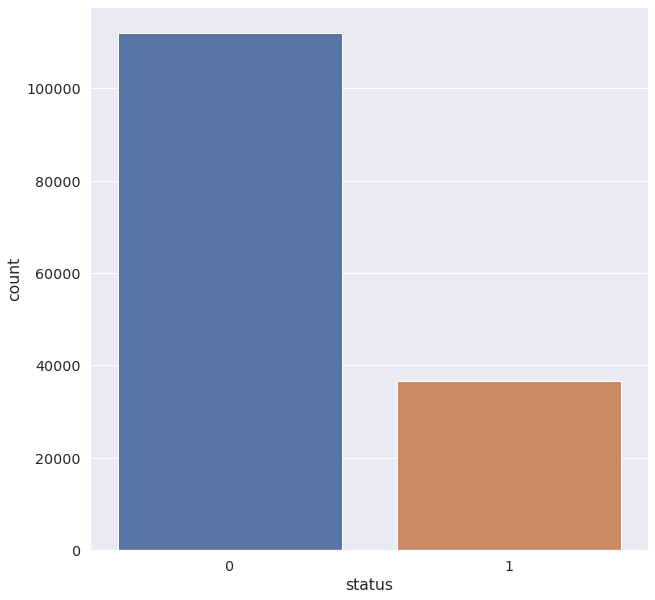

In [ ]:
sns.countplot(data=df , x='status')

<Axes: xlabel='age', ylabel='count'>

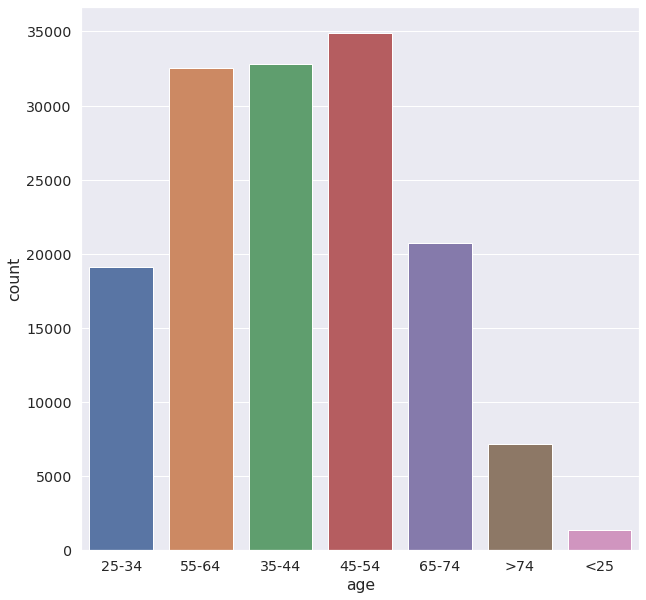

In [ ]:
sns.countplot(data=df , x='age')

<Axes: xlabel='rate_of_interest', ylabel='income'>

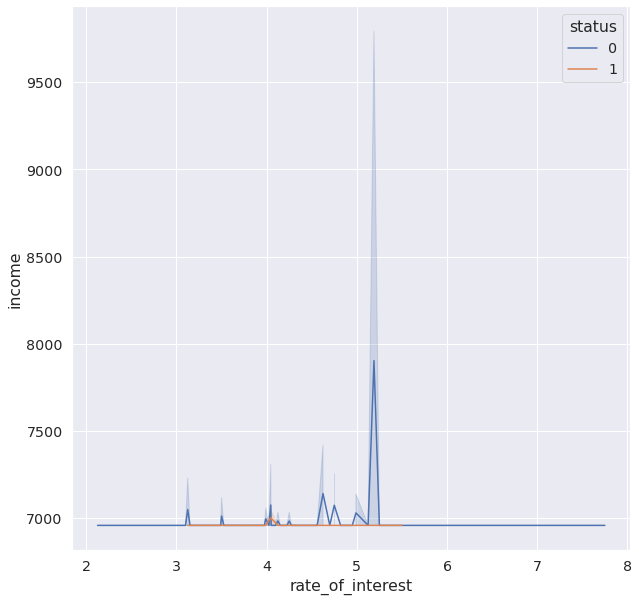

In [ ]:
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="status")

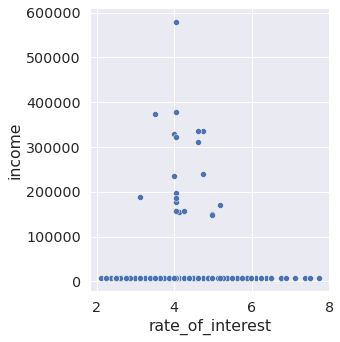

In [ ]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

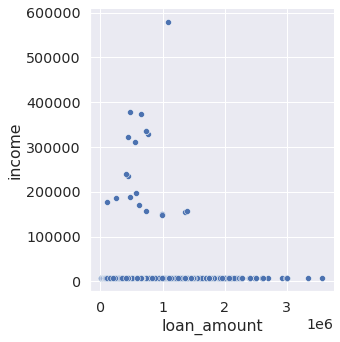

In [ ]:
sns.relplot(x ="loan_amount", y ="income",data = df)

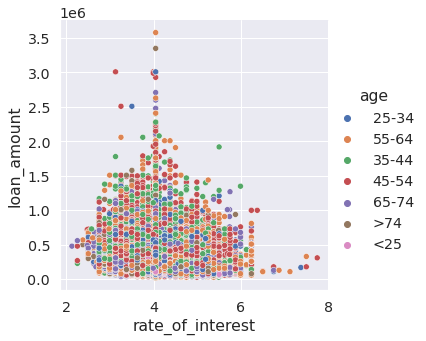

In [ ]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='age' ,data = df)

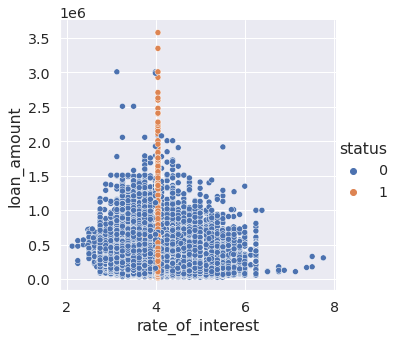

In [ ]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='status' ,data = df)

<ipython-input-97-bc3b6db04a56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'])


<Axes: xlabel='loan_amount', ylabel='Density'>

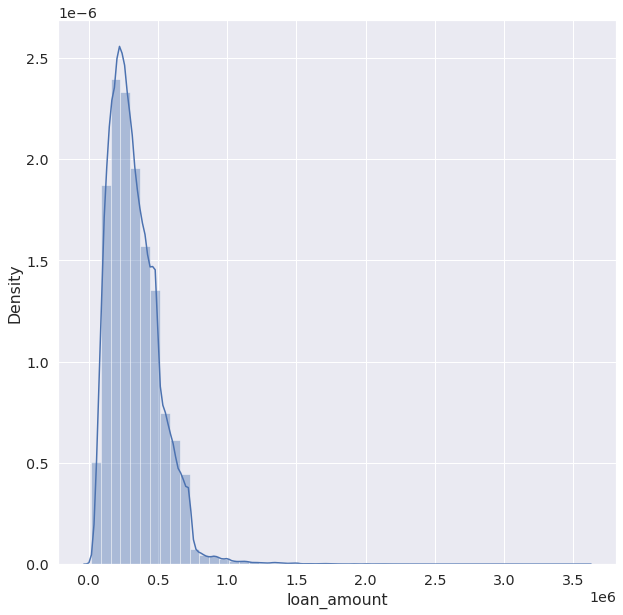

In [ ]:
sns.distplot(df['loan_amount'])

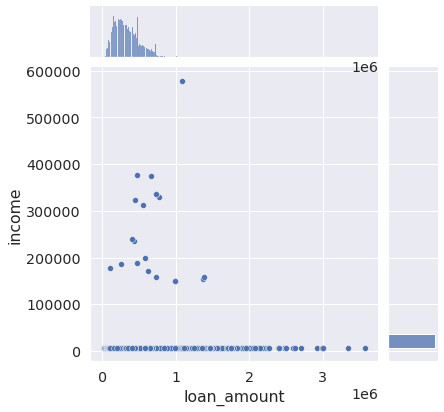

In [ ]:
sns.jointplot(data=df,x='loan_amount' , y = 'income')

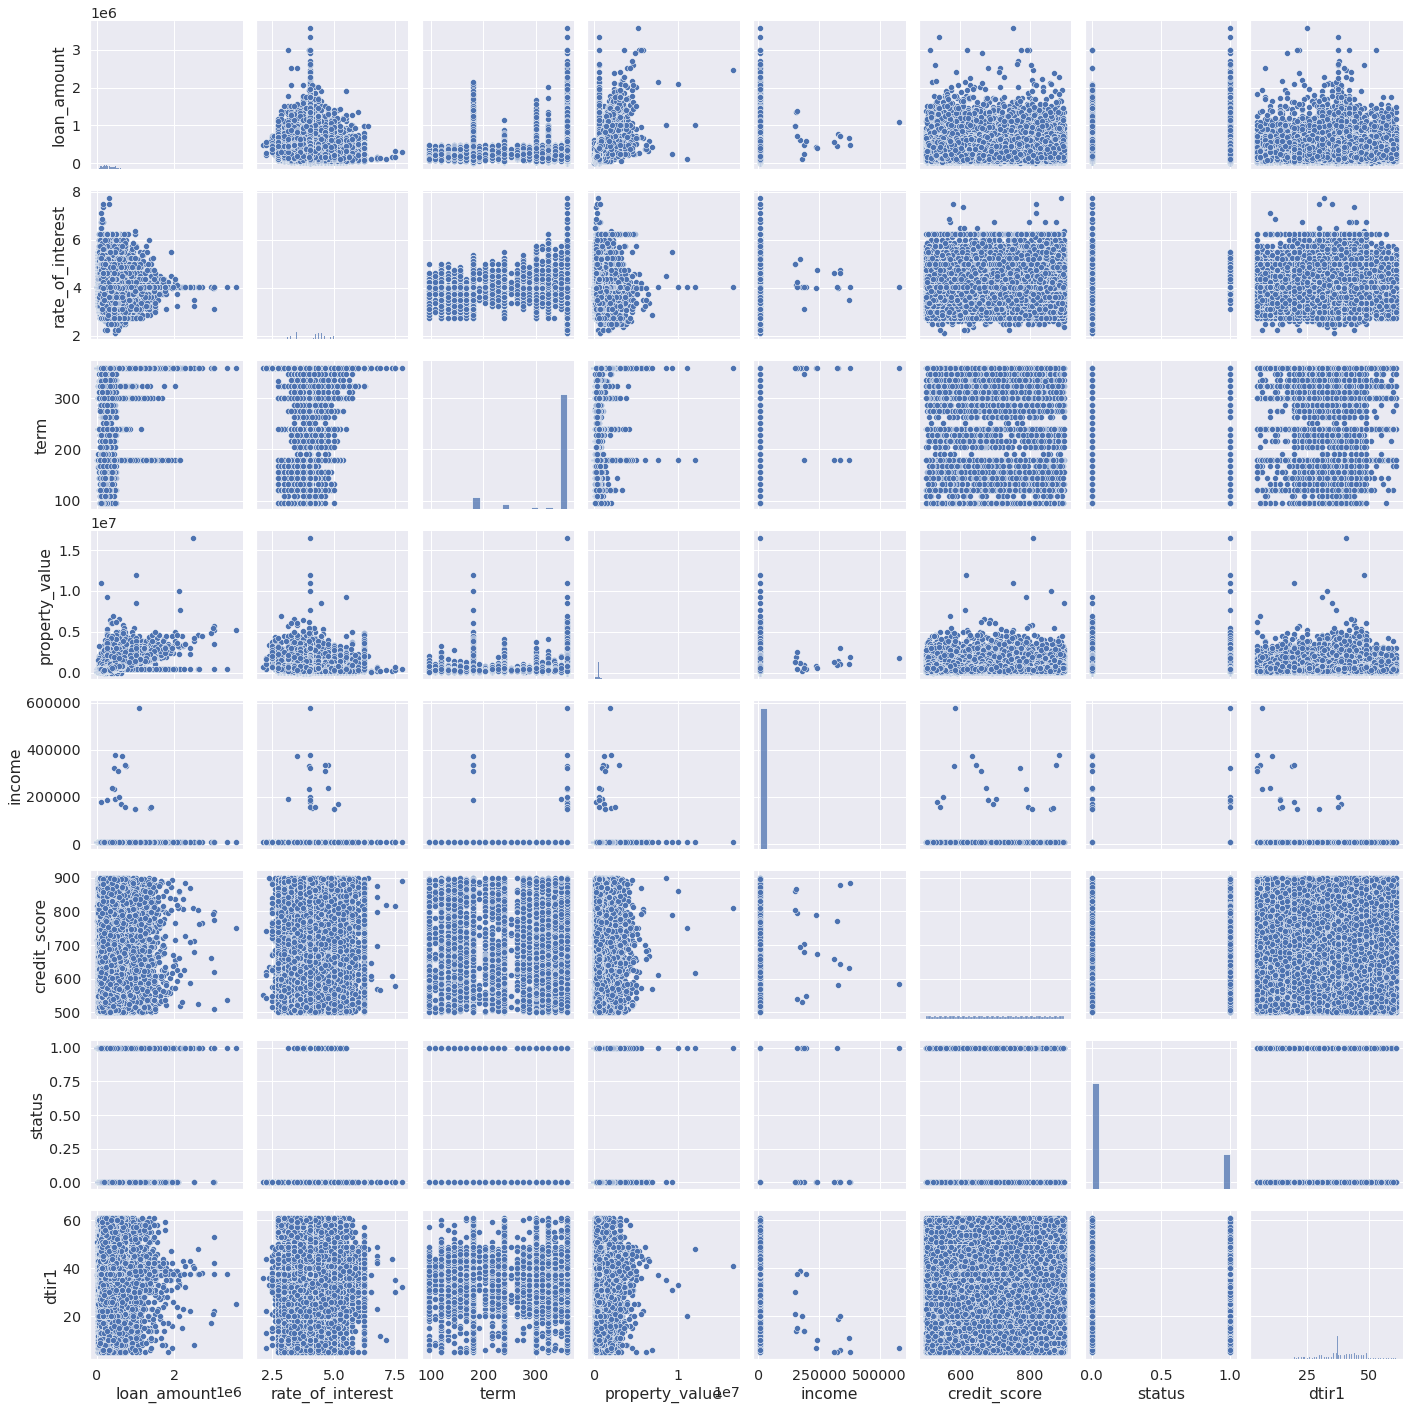

In [ ]:
sns.pairplot(df)

<Axes: xlabel='status', ylabel='loan_amount'>

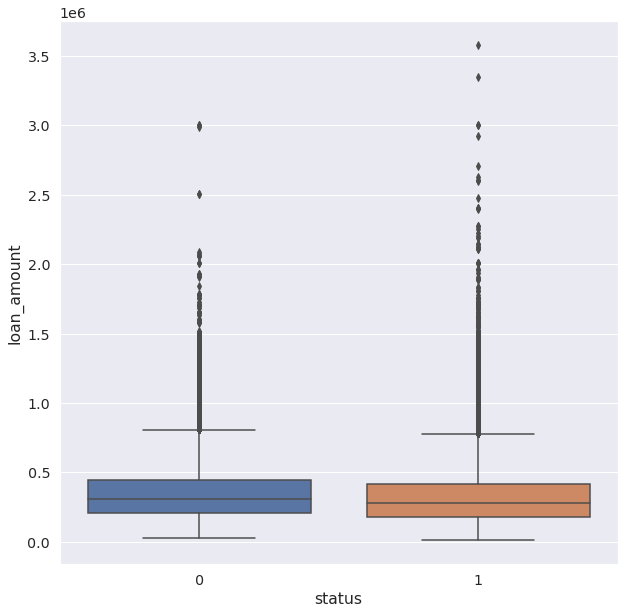

In [ ]:
sns.boxplot(data=df , x='status' , y ='loan_amount')

<Axes: xlabel='status', ylabel='term'>

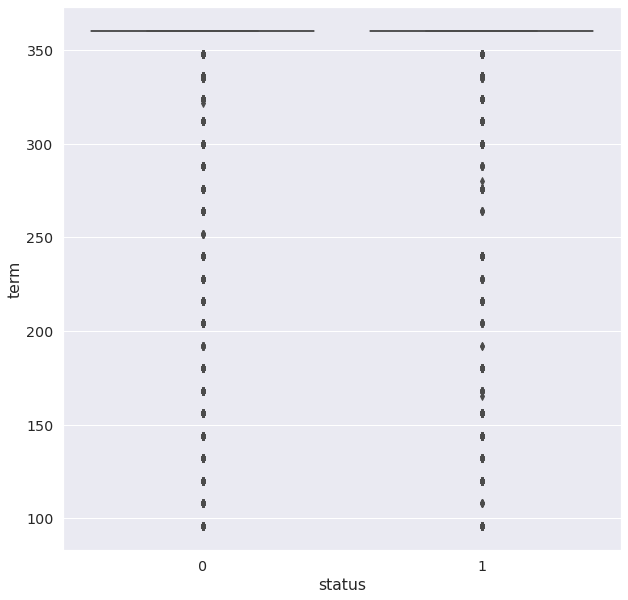

In [ ]:
sns.boxplot(data=df , x='status' , y ='term')

<Axes: xlabel='status', ylabel='income'>

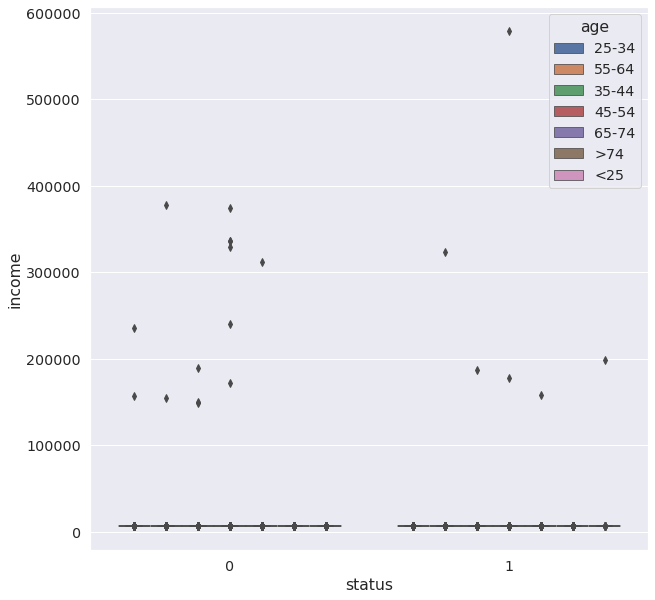

In [ ]:
sns.boxplot(data=df , x='status' , y ='income' , hue='age')

<Axes: xlabel='age', ylabel='credit_score'>

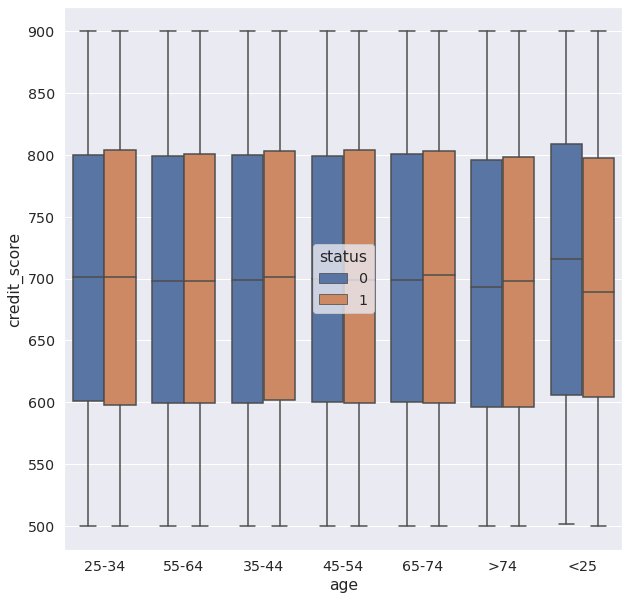

In [ ]:
sns.boxplot(data=df , x='age' , y ='credit_score' , hue='status')

<Axes: >

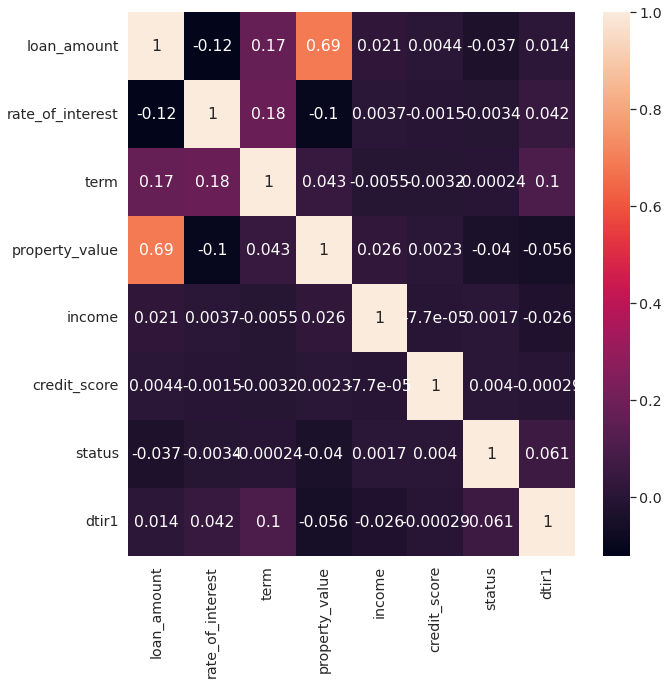

In [ ]:
sns.heatmap(df.corr() , annot = True)

All data must be numerical to be used in ML

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  148664 non-null  float64
 3   term              148664 non-null  float64
 4   property_value    148664 non-null  float64
 5   income            148664 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148664 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             148664 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 16.5+ MB


In [ ]:
df = pd.get_dummies(df, columns=['loan_type','age'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148664 non-null  int64  
 1   rate_of_interest  148664 non-null  float64
 2   term              148664 non-null  float64
 3   property_value    148664 non-null  float64
 4   income            148664 non-null  float64
 5   credit_score      148664 non-null  int64  
 6   status            148664 non-null  int64  
 7   dtir1             148664 non-null  float64
 8   loan_type_type2   148664 non-null  uint8  
 9   loan_type_type3   148664 non-null  uint8  
 10  age_35-44         148664 non-null  uint8  
 11  age_45-54         148664 non-null  uint8  
 12  age_55-64         148664 non-null  uint8  
 13  age_65-74         148664 non-null  uint8  
 14  age_<25           148664 non-null  uint8  
 15  age_>74           148664 non-null  uint8  
dtypes: float64(5), int64

In [ ]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,1,45.000000,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,1,37.732932,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,0,46.000000,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,0,42.000000,0,0,0,1,0,0,0,0
4,696500,4.045482,360.0,758000.000000,6957.392164,602,0,39.000000,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(148664, 16)

In [ ]:
# data split
x = df.drop('status', axis=1)
y = df['status']

In [ ]:
x

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,45.000000,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,37.732932,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,46.000000,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,42.000000,0,0,0,1,0,0,0,0
4,696500,4.045482,360.0,758000.000000,6957.392164,602,39.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125000,180.0,608000.000000,6957.392164,659,48.000000,0,0,0,0,1,0,0,0
148666,586500,5.190000,360.0,788000.000000,6957.392164,569,15.000000,0,0,0,0,0,0,0,0
148667,446500,3.125000,180.0,728000.000000,6957.392164,702,49.000000,0,0,0,1,0,0,0,0
148668,196500,3.500000,180.0,278000.000000,6957.392164,737,29.000000,0,0,0,0,1,0,0,0


In [ ]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: status, Length: 148664, dtype: int64

In [ ]:
x.shape

(148664, 15)

In [ ]:
y.shape

(148664,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [ ]:
x_train

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
135342,666500,3.500,240.0,938000.0,6957.392164,712,41.0,0,0,0,0,1,0,0,0
59787,676500,4.250,360.0,768000.0,6957.392164,520,39.0,0,0,1,0,0,0,0,0
2294,416500,4.250,360.0,428000.0,6957.392164,505,33.0,0,0,0,0,0,0,0,0
27779,466500,4.125,360.0,628000.0,6957.392164,843,36.0,0,0,0,0,0,0,0,0
5516,366500,5.125,360.0,458000.0,6957.392164,690,45.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502,636500,4.375,360.0,808000.0,6957.392164,531,34.0,0,0,0,0,1,0,0,0
87845,106500,4.625,360.0,128000.0,6957.392164,718,49.0,0,0,0,1,0,0,0,0
130260,726500,4.125,360.0,978000.0,6957.392164,666,37.0,0,0,0,1,0,0,0,0
136862,276500,3.990,180.0,368000.0,6957.392164,774,34.0,0,0,0,0,1,0,0,0


In [ ]:
x_train.shape

(104064, 15)

In [ ]:
x_test

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
70312,206500,3.125000,180.0,528000.000000,6957.392164,718,36.000000,0,0,0,0,0,0,0,0
52171,306500,3.625000,180.0,398000.000000,6957.392164,868,20.000000,0,0,0,0,0,0,0,0
80961,356500,3.750000,360.0,508000.000000,6957.392164,602,27.000000,0,0,0,0,0,1,0,0
42613,246500,4.045482,360.0,288000.000000,6957.392164,566,33.000000,0,0,0,0,0,0,0,0
1052,256500,4.625000,360.0,288000.000000,6957.392164,846,46.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28209,386500,3.250000,180.0,558000.000000,6957.392164,761,42.000000,0,0,0,1,0,0,0,0
50599,376500,4.990000,360.0,468000.000000,6957.392164,867,36.000000,0,0,1,0,0,0,0,0
87792,166500,4.045482,360.0,497900.200647,6957.392164,740,37.732932,1,0,0,1,0,0,0,0
143902,456500,4.045482,360.0,497900.200647,6957.392164,720,37.732932,0,0,0,1,0,0,0,0


In [ ]:
x_test.shape

(44600, 15)

In [ ]:
y_train

135342    0
59787     0
2294      0
27779     0
5516      0
         ..
5502      0
87845     0
130260    0
136862    0
83523     0
Name: status, Length: 104064, dtype: int64

In [ ]:
x_train.shape

(104064, 15)

In [ ]:
y_train.shape

(104064,)

In [ ]:
y_train.value_counts()

0    78397
1    25667
Name: status, dtype: int64

In [ ]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

0    78397
1    78397
Name: status, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[32859   771]
 [  639 10331]]
0.9683856502242153


In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 0.9999936222049313
testing accuaracy: 0.9683856502242153


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[32742   888]
 [  130 10840]]
0.9771748878923767


In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 0.9999872444098626
testing accuaracy: 0.9771748878923767


K-Nearest Neighbors algorithm is a simple and easy machine learning algorithm that can be used to solve both classications and make predictions about individual data points. From the result above, we can see the training accuracy rate is about almost 100%, and the testing accuracy is about 98%. The data was built by filling in a lot of empty values as well as dropping some invaluable informations and many more to predict the defaulters.